In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('stocks.csv')

In [ ]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [ ]:
df.isnull().sum()

,0
Ticker,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.dtypes

,0
Ticker,object
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [ ]:
df = df.drop('Date', axis=1)


In [ ]:
df.head()

,Ticker,Open,High,Low,Close,Adj Close,Volume
0,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [ ]:
df.head()

,Ticker,Open,High,Low,Close,Adj Close,Volume
0,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [ ]:
df

,Ticker,Open,High,Low,Close,Adj Close,Volume
0,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...
243,GOOG,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,248.0,2.152521e+02,9.169131e+01,8.954000e+01,1.352350e+02,2.087650e+02,3.041775e+02,3.724100e+02
High,248.0,2.179197e+02,9.286302e+01,9.013000e+01,1.374400e+02,2.126150e+02,3.075650e+02,3.738300e+02
Low,248.0,2.126975e+02,9.014788e+01,8.886000e+01,1.348225e+02,2.081850e+02,2.954375e+02,3.617400e+02
Close,248.0,2.153817e+02,9.146199e+01,8.935000e+01,1.363475e+02,2.099200e+02,3.039425e+02,3.668300e+02
Adj Close,248.0,2.153627e+02,9.145475e+01,8.935000e+01,1.363475e+02,2.099200e+02,3.039425e+02,3.668300e+02
Volume,248.0,3.208210e+07,2.233590e+07,2.657900e+06,1.714180e+07,2.734000e+07,4.771772e+07,1.133164e+08


In [ ]:
print("Open =",(df['Open']== 0).sum())
print("High =",(df['High']== 0).sum())
print("Low =",(df['Low']== 0).sum())
print("Close =",(df['Close']== 0).sum())
print("Adj Close =",(df['Adj Close']== 0).sum())
print("Volume =",(df['Volume']== 0).sum())

Open = 0
High = 0
Low = 0
Close = 0
Adj Close = 0
Volume = 0


In [ ]:
df['Ticker'].value_counts()

,count
Ticker,
AAPL,62
MSFT,62
NFLX,62
GOOG,62


Graph

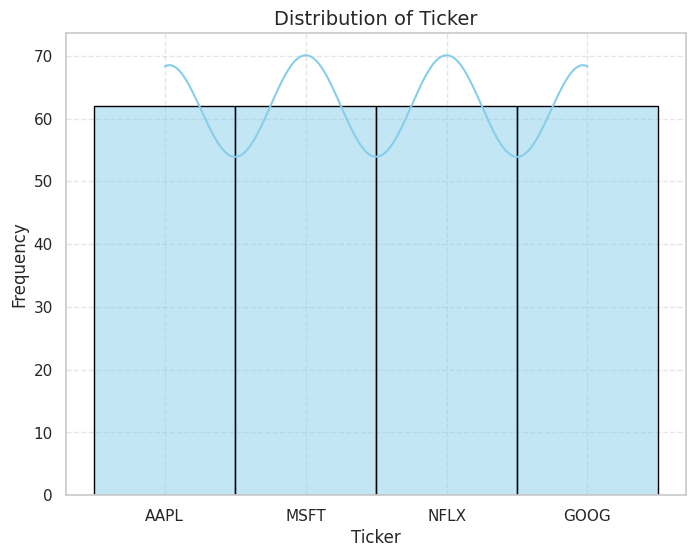

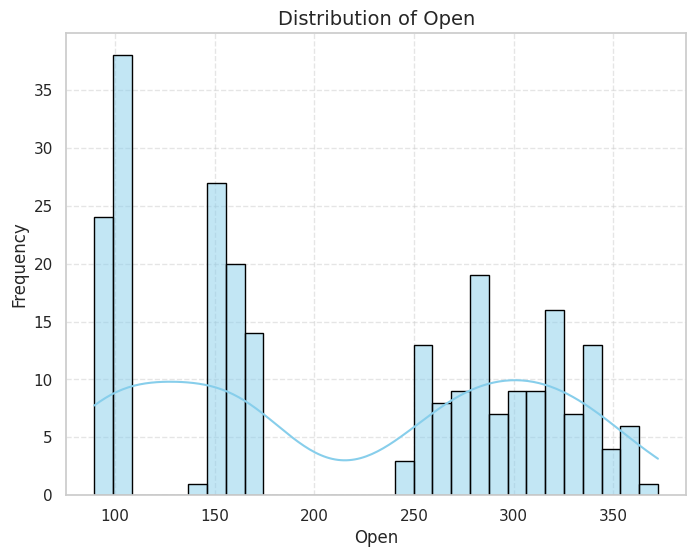

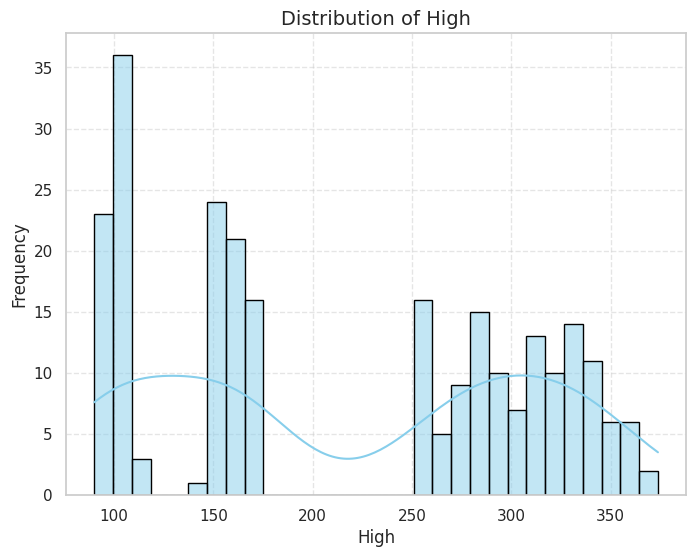

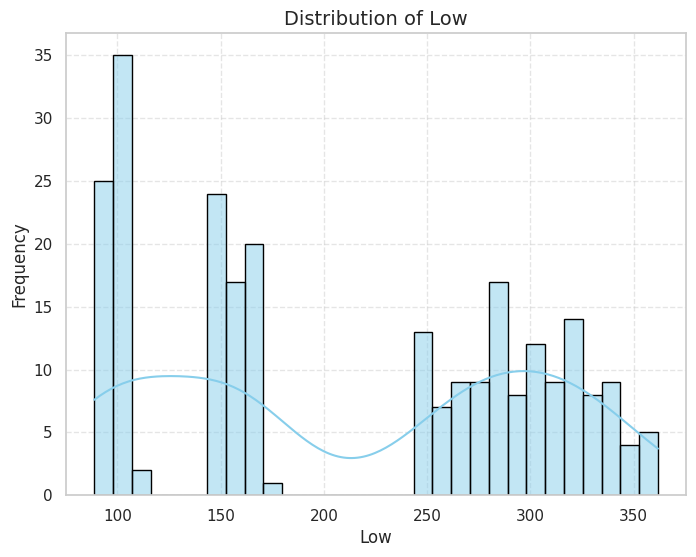

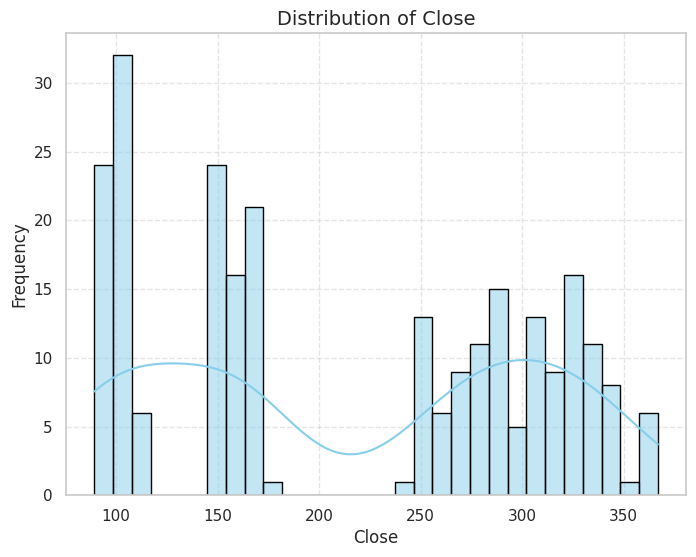

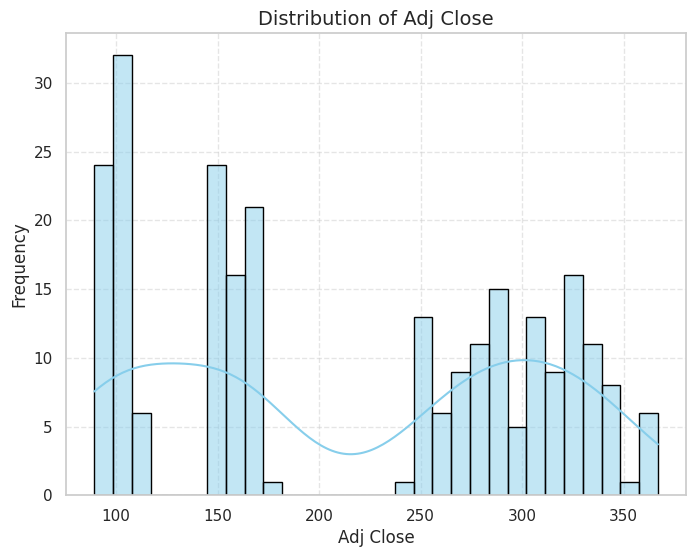

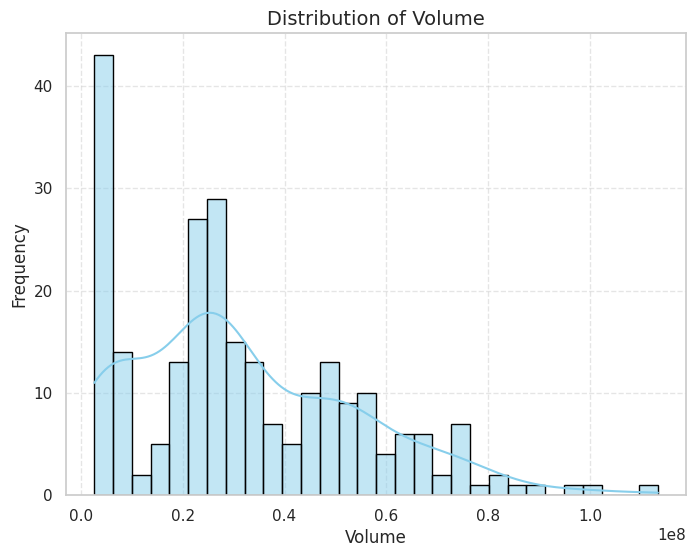

In [ ]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

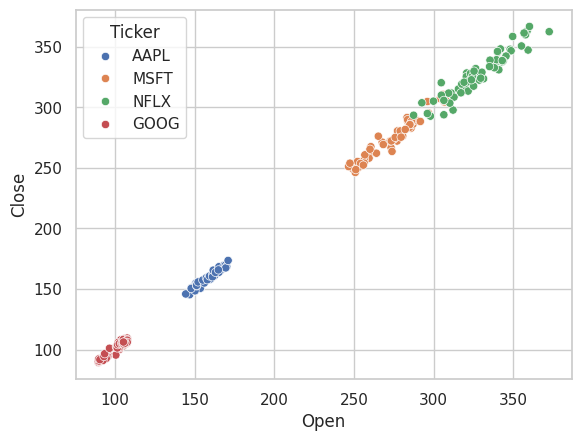

In [ ]:
# 1. Open vs Close (scatter)
sns.scatterplot(data=df, x='Open', y='Close', hue='Ticker')
axs[0, 0].set_title('Open vs Close Price')
plt.show()


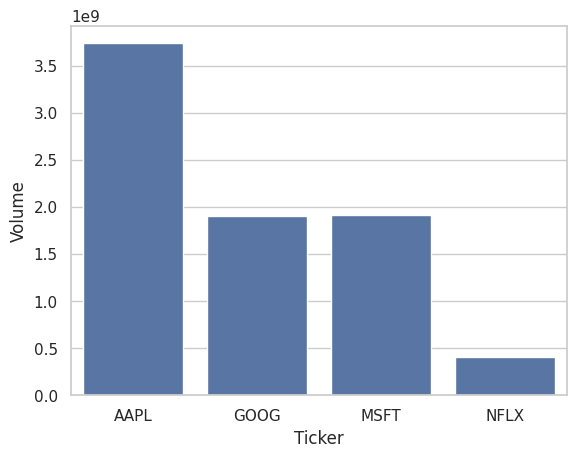

In [ ]:
# 2. Volume per Ticker (bar)
volume_by_ticker = df.groupby('Ticker')['Volume'].sum().reset_index()
sns.barplot(data=volume_by_ticker, x='Ticker', y='Volume')
axs[0, 1].set_title('Total Volume per Ticker')
plt.show()

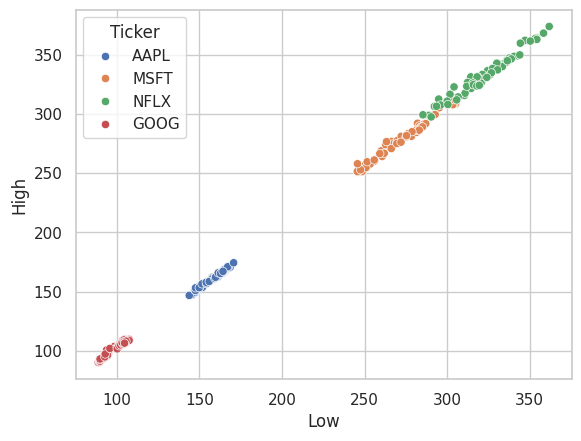

In [ ]:
# 3. High vs Low (scatter)
sns.scatterplot(data=df, x='Low', y='High', hue='Ticker')
axs[1, 0].set_title('Low vs High Price')
plt.show()

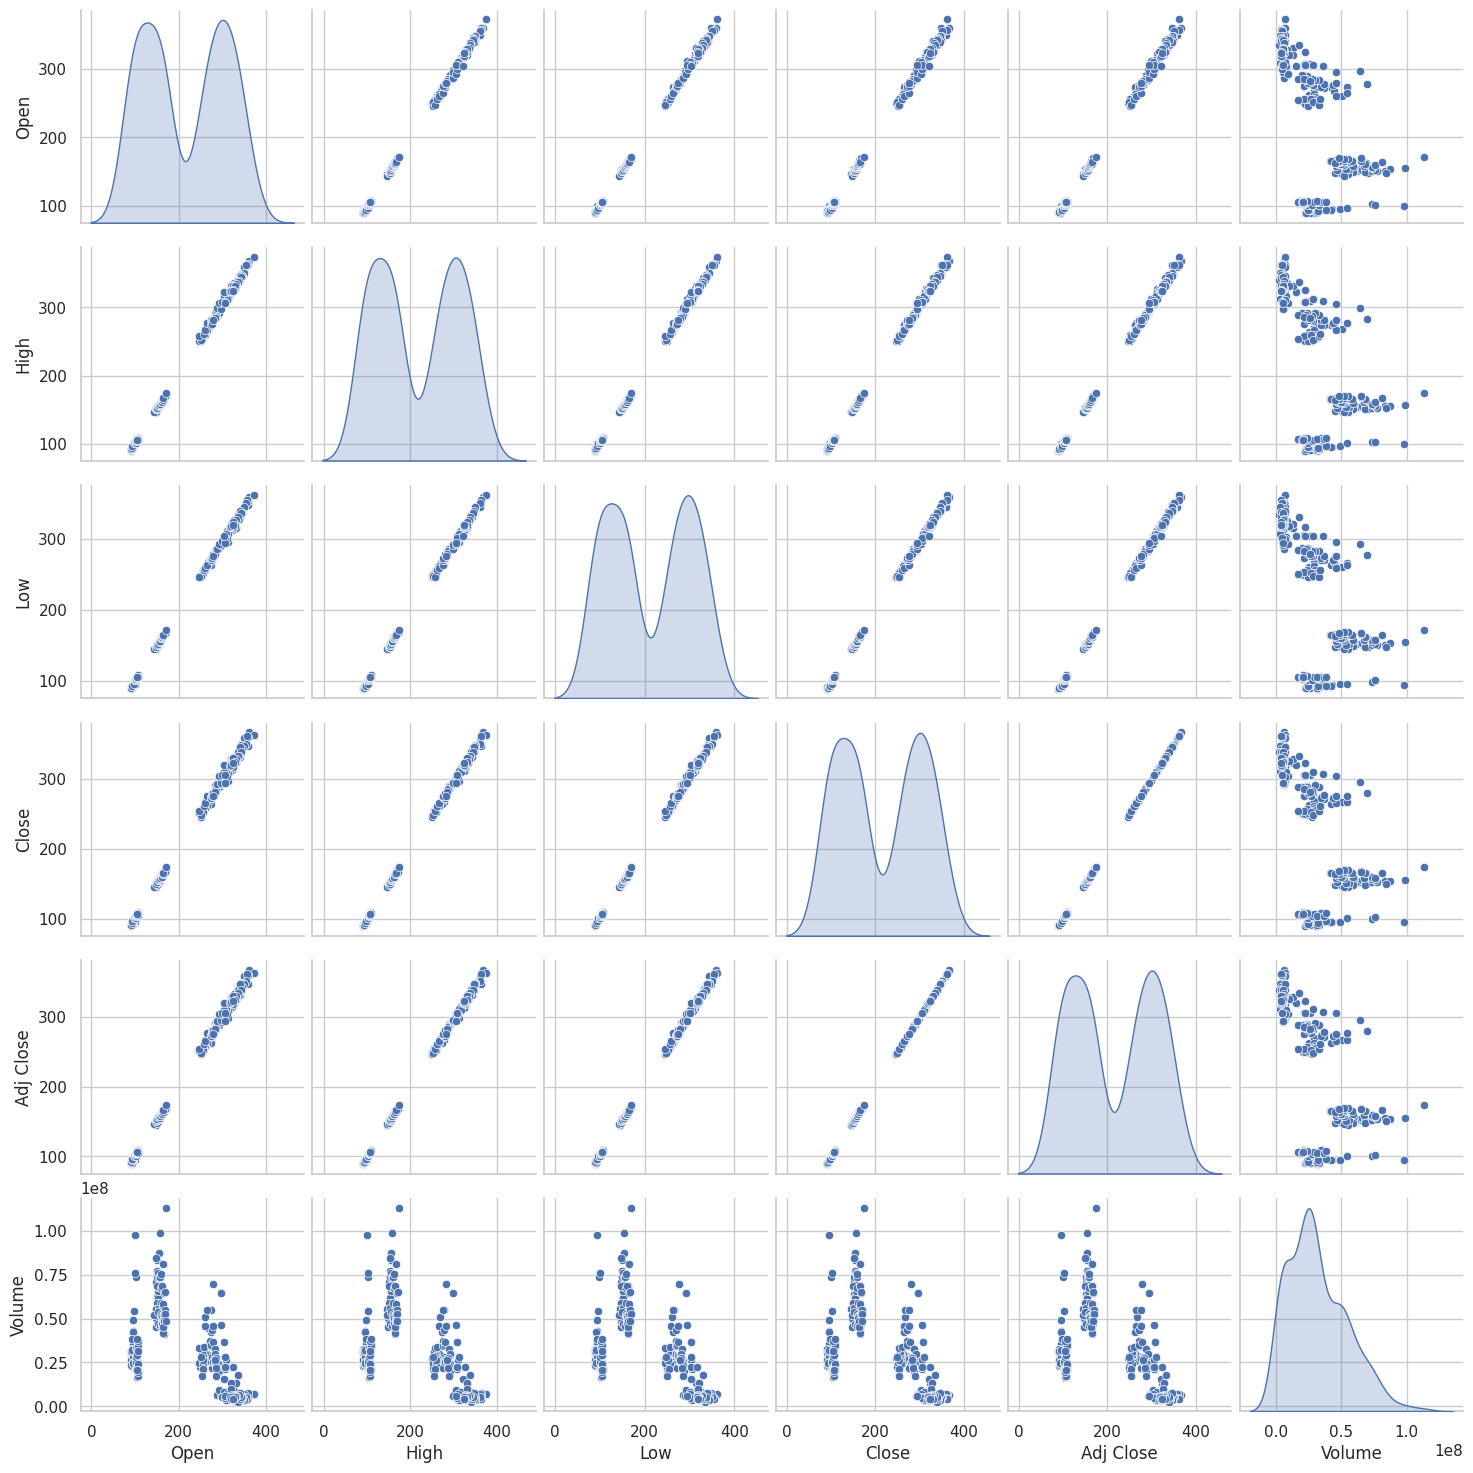

In [ ]:

sns.pairplot(df, diag_kind='kde')

In [ ]:
df = pd.get_dummies(df, columns=['Ticker'])

In [ ]:

df['Ticker_AAPL'] = df['Ticker_AAPL'].astype(int)
df['Ticker_GOOG'] = df['Ticker_GOOG'].astype(int)
df['Ticker_MSFT'] = df['Ticker_MSFT'].astype(int)
df['Ticker_NFLX'] = df['Ticker_NFLX'].astype(int)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Ticker_AAPL,Ticker_GOOG,Ticker_MSFT,Ticker_NFLX
0,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,1,0,0,0
1,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,1,0,0,0
2,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,1,0,0,0
3,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,1,0,0,0
4,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
243,107.720001,108.680000,107.500000,107.709999,107.709999,20926300,0,1,0,0
244,107.660004,107.730003,104.500000,105.980003,105.980003,20343100,0,1,0,0
245,106.220001,108.129997,105.620003,106.120003,106.120003,17116300,0,1,0,0
246,106.160004,106.300003,104.699997,105.209999,105.209999,19780600,0,1,0,0


In [ ]:
X =df.drop('Adj Close', axis=1)
y = df[['Adj Close']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Open is -0.001194434903959229
The coefficient for High is -0.009822916976811213
The coefficient for Low is 0.005581139184220678
The coefficient for Close is 1.0055602555010512
The coefficient for Volume is -1.4058301016361963e-09
The coefficient for Ticker_AAPL is 0.03776841553868626
The coefficient for Ticker_GOOG is 0.009737680422913586
The coefficient for Ticker_MSFT is -0.0547462303030353
The coefficient for Ticker_NFLX is 0.007240134341435363


In [ ]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.03675853397993478


In [ ]:
regression_model.score(X_test, y_test)

0.9999984527331555

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Ticker_AAPL,Ticker_GOOG,Ticker_MSFT,Ticker_NFLX
0,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,1,0,0,0
1,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,1,0,0,0
2,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,1,0,0,0
3,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,1,0,0,0
4,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
243,107.720001,108.680000,107.500000,107.709999,107.709999,20926300,0,1,0,0
244,107.660004,107.730003,104.500000,105.980003,105.980003,20343100,0,1,0,0
245,106.220001,108.129997,105.620003,106.120003,106.120003,17116300,0,1,0,0
246,106.160004,106.300003,104.699997,105.209999,105.209999,19780600,0,1,0,0


<ipython-input-133-ea106d78c63d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['High'])


<Axes: xlabel='High', ylabel='Density'>

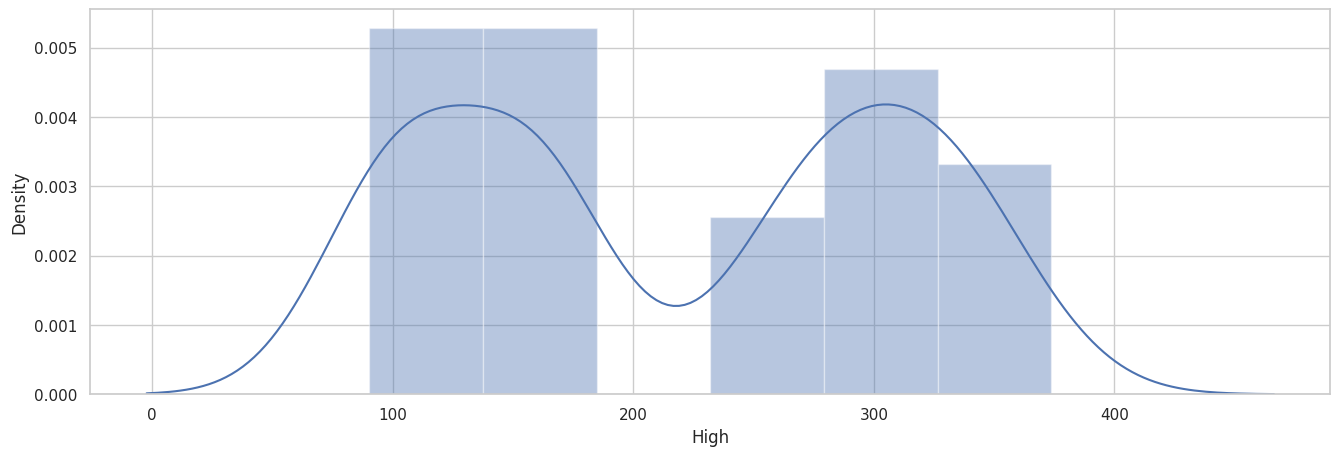

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(df['High'])

<ipython-input-134-ea106d78c63d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['High'])


<Axes: xlabel='High', ylabel='Density'>

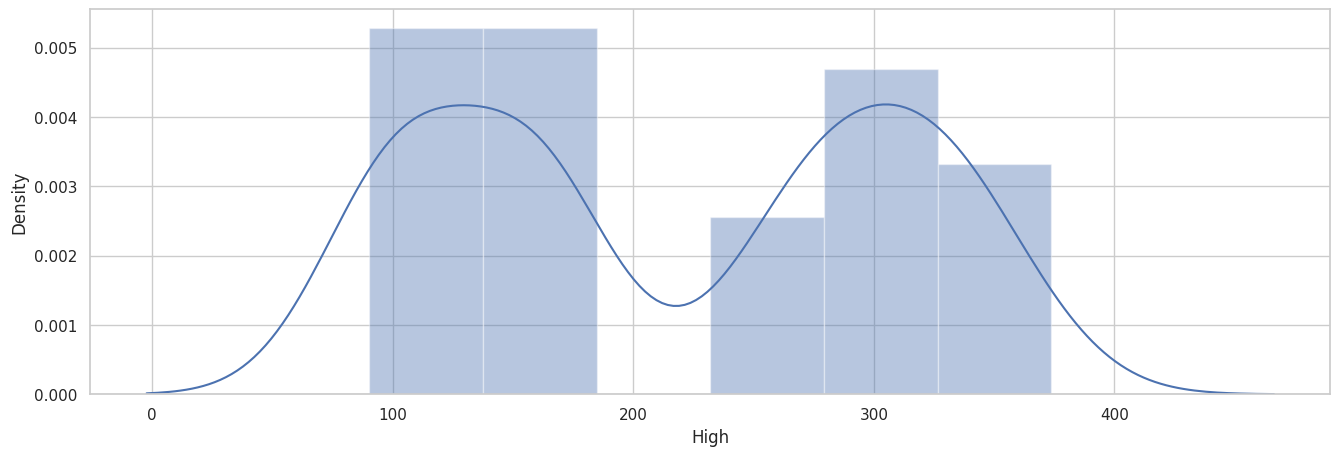

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(df['High'])

<ipython-input-135-958b55913e47>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Low'])


<Axes: xlabel='Low', ylabel='Density'>

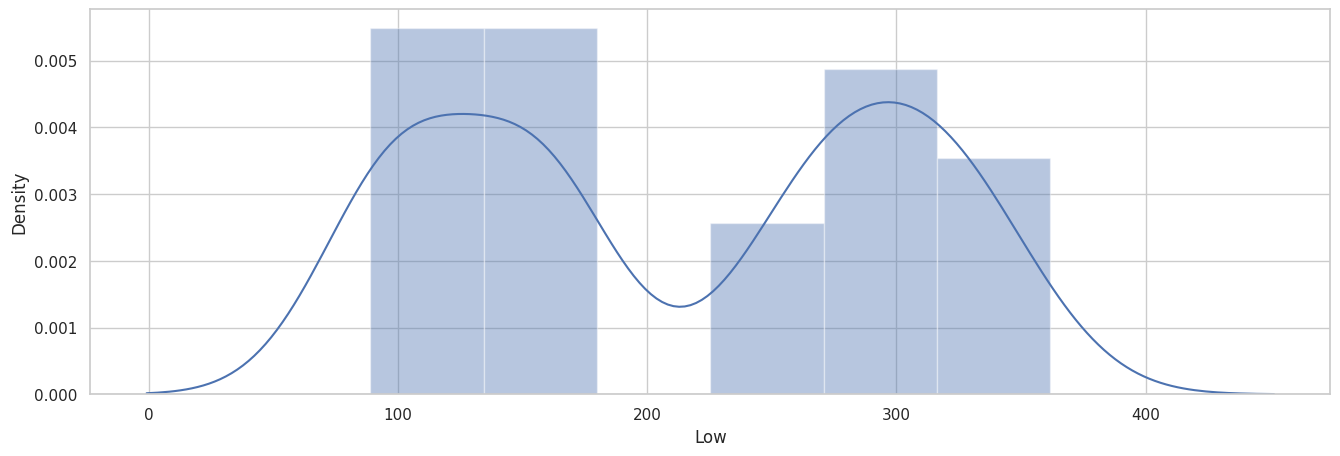

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(df['Low'])

<ipython-input-136-e38224e00ec9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Close'])


<Axes: xlabel='Close', ylabel='Density'>

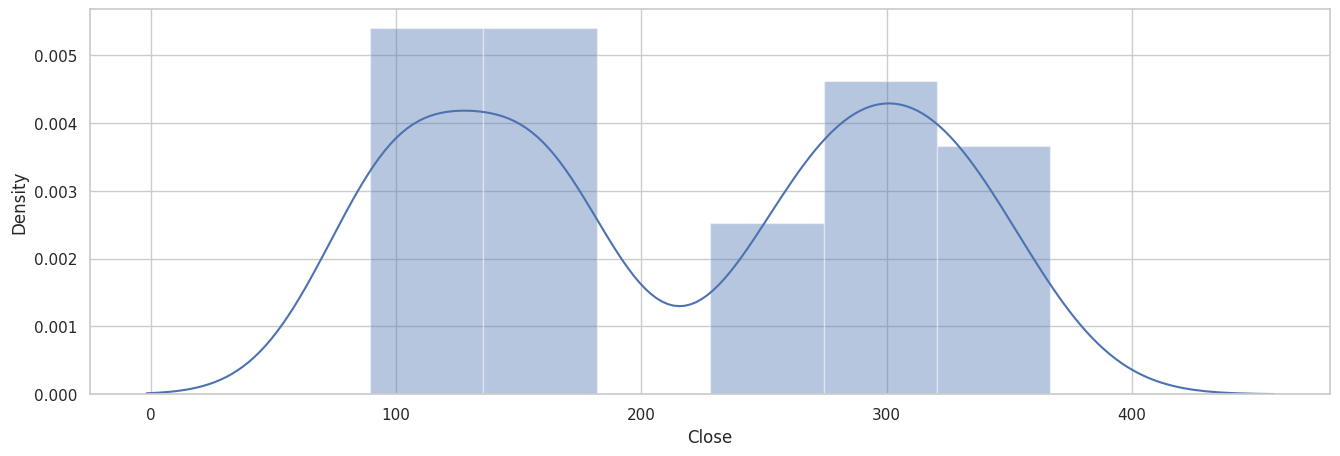

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(df['Close'])

<ipython-input-137-255e1aab874e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Adj Close'])


<Axes: xlabel='Adj Close', ylabel='Density'>

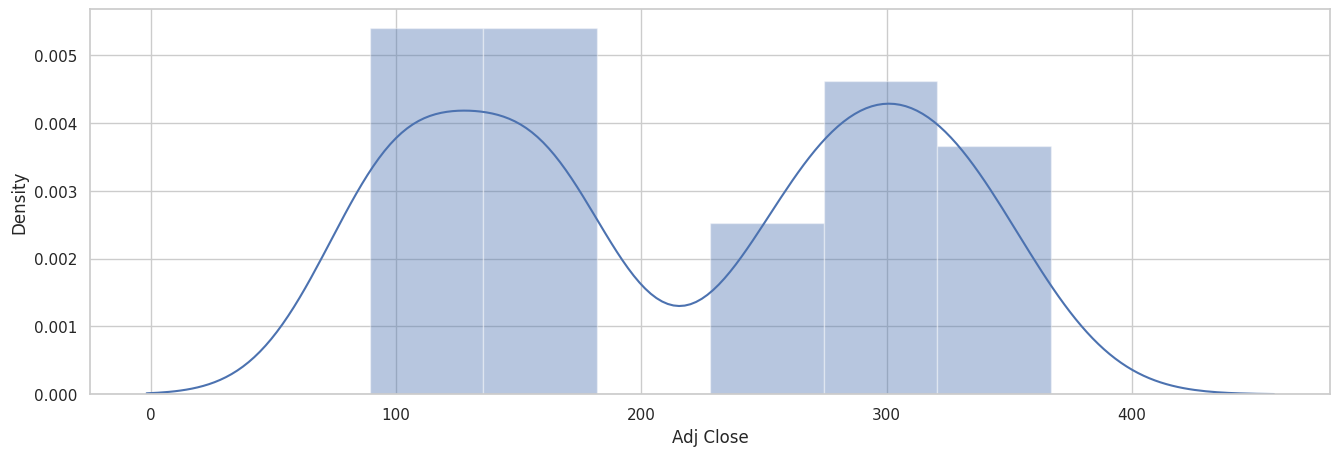

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(df['Adj Close'])

<ipython-input-138-7c733612c6c2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Volume'])


<Axes: xlabel='Volume', ylabel='Density'>

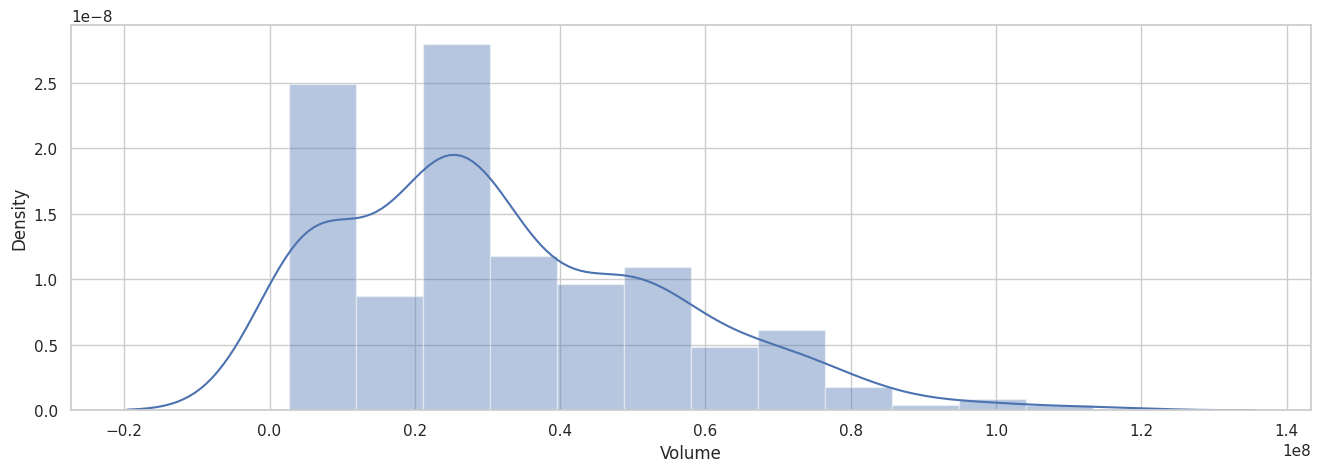

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(df['Volume'])

<ipython-input-139-a924530c5f77>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ticker_AAPL'])


<Axes: xlabel='Ticker_AAPL', ylabel='Density'>

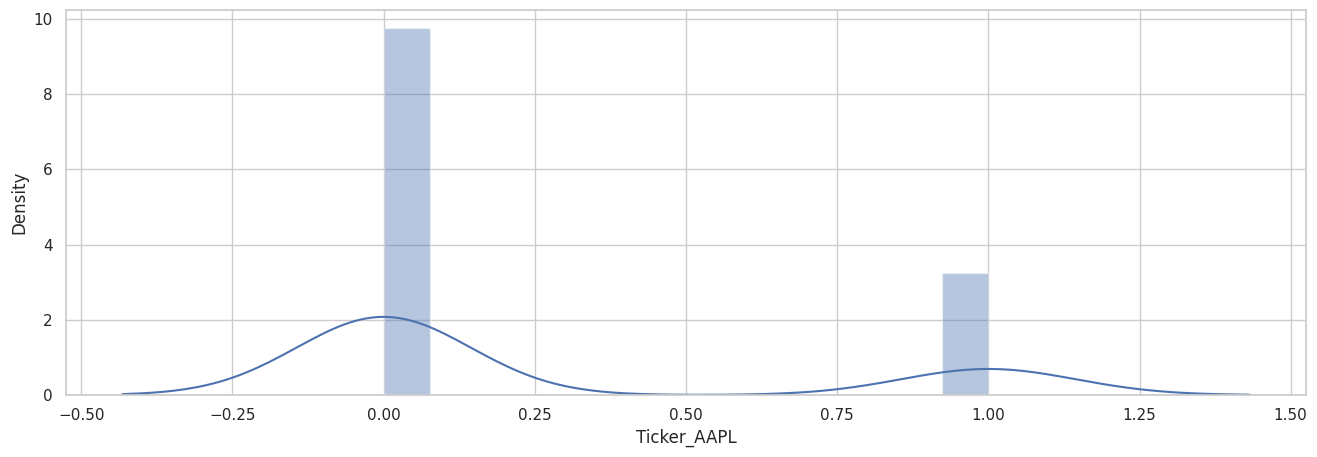

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(df['Ticker_AAPL'])

<ipython-input-140-2f26fd4addce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ticker_GOOG'])


<Axes: xlabel='Ticker_GOOG', ylabel='Density'>

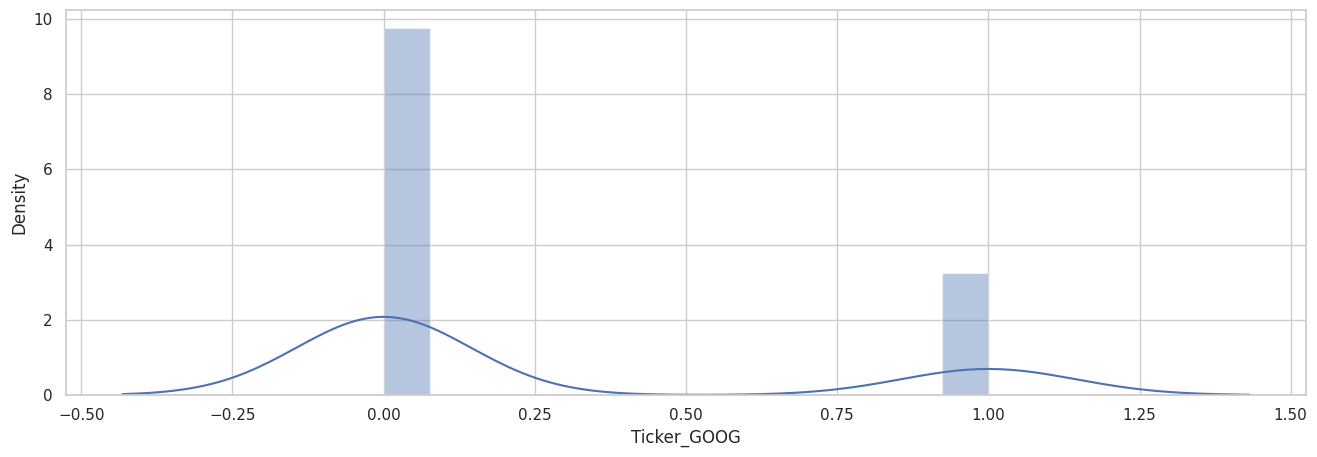

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(df['Ticker_GOOG'])

<ipython-input-141-9d33e57c8c12>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ticker_MSFT'])


<Axes: xlabel='Ticker_MSFT', ylabel='Density'>

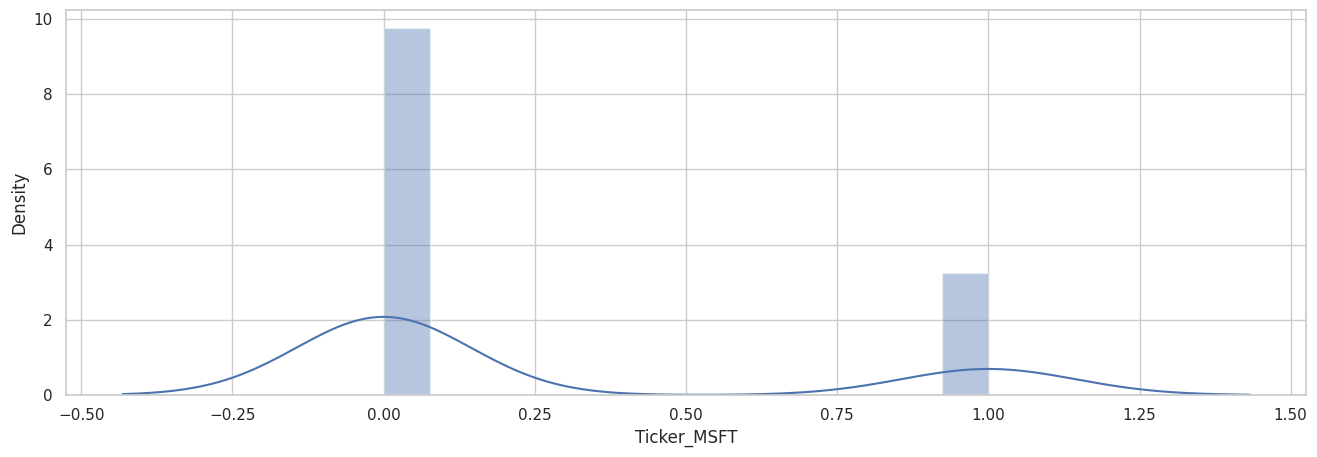

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(df['Ticker_MSFT'])

<ipython-input-142-f888433983f0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ticker_NFLX'])


<Axes: xlabel='Ticker_NFLX', ylabel='Density'>

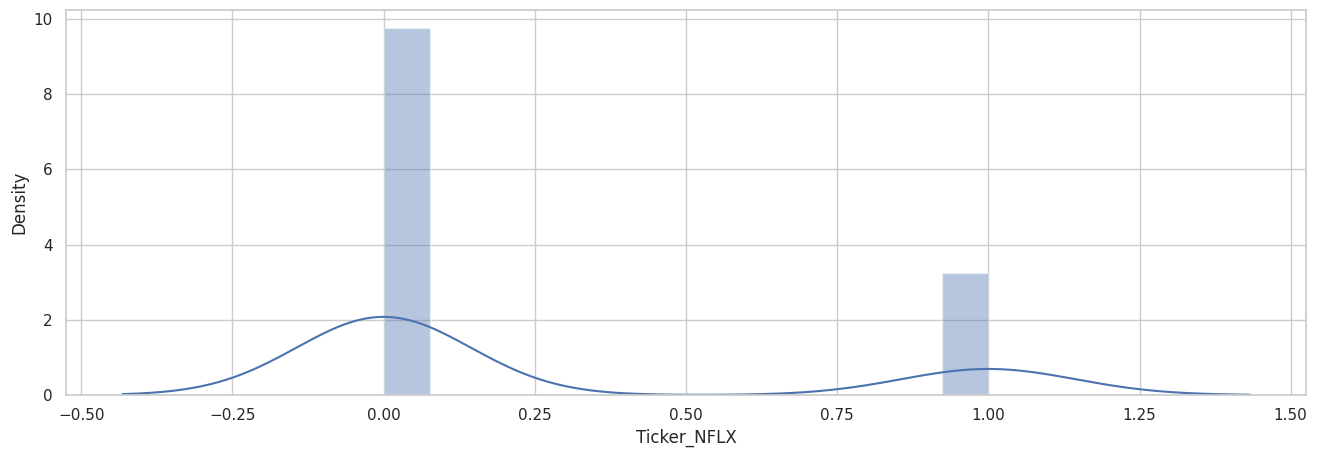

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(df['Ticker_NFLX'])

In [ ]:
target = 'Adj Close'
features = ['Open', 'High', 'Low', 'Close', 'Volume']

In [ ]:
percentile25 = df[features].quantile(0.25)
percentile75 = df[features].quantile(0.75)

In [ ]:
iqr = percentile75 - percentile25
iqr

,0
Open,1.689425e+02
High,1.701250e+02
Low,1.606150e+02
Close,1.675950e+02
Volume,3.057592e+07


In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
print("Upper limit\n",upper_limit)
print("Lower limit\n",lower_limit)

Upper limit
 Open      5.575913e+02
High      5.627525e+02
Low       5.363600e+02
Close     5.553350e+02
Volume    9.358161e+07
dtype: float64
Lower limit
 Open     -1.181787e+02
High     -1.177475e+02
Low      -1.061000e+02
Close    -1.150450e+02
Volume   -2.872209e+07
dtype: float64


In [ ]:
df[df[features] > upper_limit].sum()

,0
Open,0.0
High,0.0
Low,0.0
Close,0.0
Adj Close,0.0
Volume,310059600.0
Ticker_AAPL,0.0
Ticker_GOOG,0.0
Ticker_MSFT,0.0
Ticker_NFLX,0.0


In [ ]:
df[df[features] < lower_limit].sum()

,0
Open,0.0
High,0.0
Low,0.0
Close,0.0
Adj Close,0.0
Volume,0.0
Ticker_AAPL,0.0
Ticker_GOOG,0.0
Ticker_MSFT,0.0
Ticker_NFLX,0.0


In [ ]:
df.shape

(248, 10)

<ipython-input-170-5add60eac42c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[target])
<ipython-input-170-5add60eac42c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


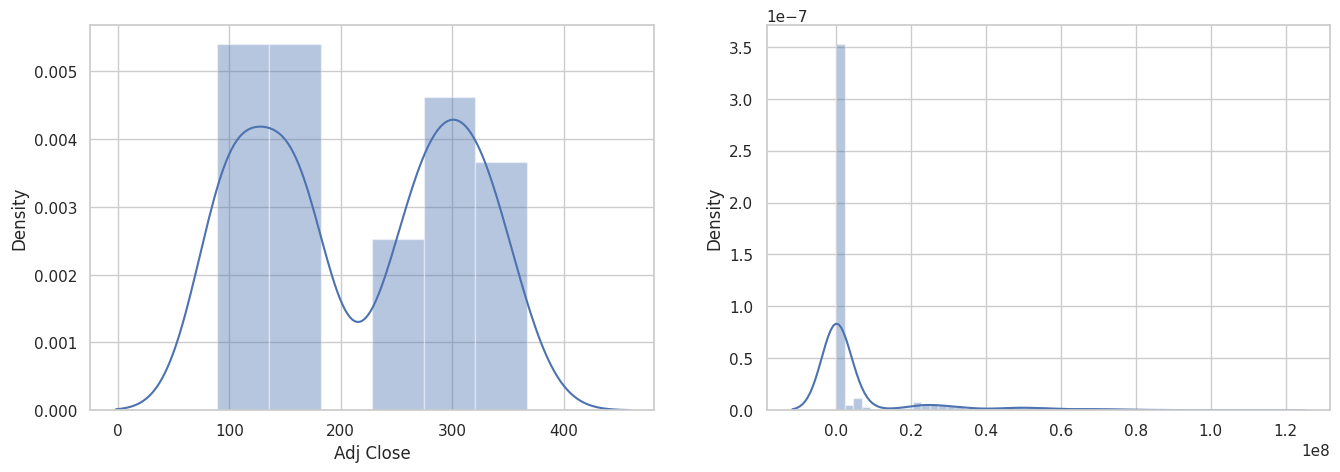

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df[target])

plt.subplot(1,2,2)
sns.distplot(df[features])

plt.show()

CAPPING

In [ ]:
new_df_cap = df.copy()

new_df_cap[features] = np.where(
    new_df_cap[features] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap[features] < lower_limit,
        lower_limit,
        new_df_cap[features]
    )
)

In [ ]:
new_df_cap.shape

(248, 10)

<ipython-input-169-e0176b128f1f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])
<ipython-input-169-e0176b128f1f>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap[features])


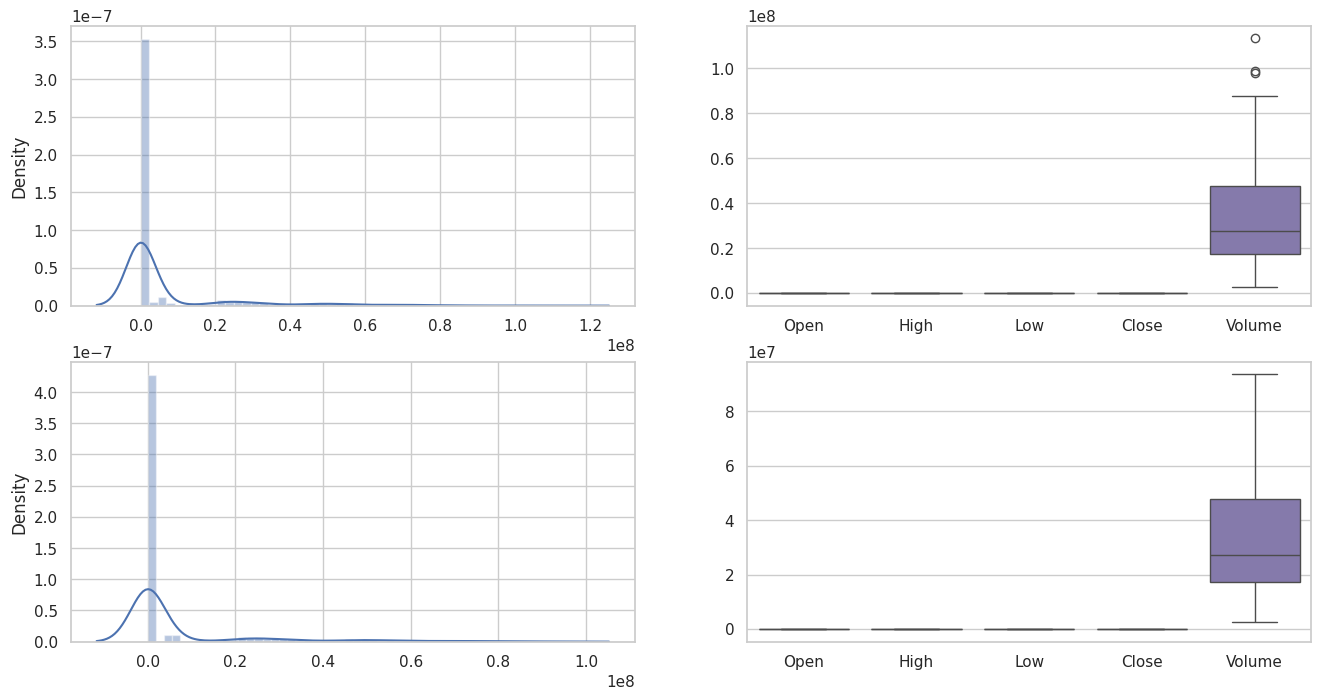

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df[features])

plt.subplot(2,2,2)
sns.boxplot(df[features])

plt.subplot(2,2,3)
sns.distplot(new_df_cap[features])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap[features])

plt.show()